 # MNIST Digit Classifier with Neural Networks

## 1- Project Overview:

    This project trains a neural network on the MNIST dataset to classify handwritten digits (0–9). It compares the performance of a model with and without activation functions, demonstrates overfitting, and applies regularization techniques to improve generalization


### Dataset

    Source: MNIST Handwritten Digit Database
    Size:

        - Training set: 60,000 images
        - Test set: 10,000 images

    Image shape: 28×28 grayscale

### Import the necessary libraries

In [1]:
from keras.datasets import mnist
from  keras import models ,layers ,activations
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

2025-07-24 21:50:38.735120: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753393838.942992      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753393839.005112      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 2- Load & Split The Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
valid = 0.001 * X_train.shape[0]
X_validation = X_train[:int(valid)]
y_validation = y_train[:int(valid)]
X_train = X_train[int(valid):]
y_train = y_train[int(valid):]

### Show Simple

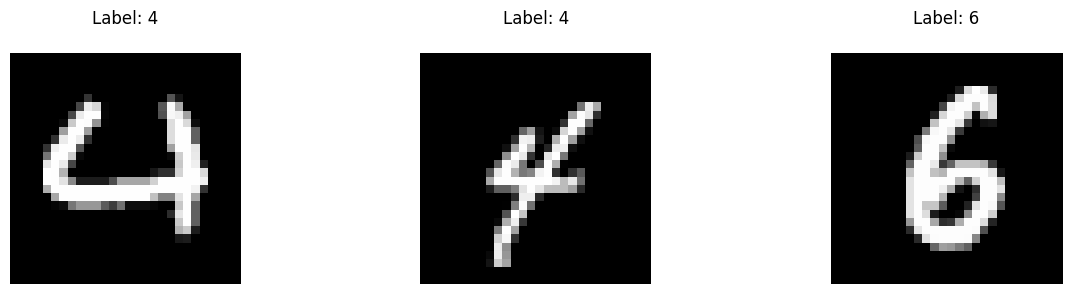

In [4]:
plt.figure(figsize=(15, 3))
for index, (image, label) in enumerate(zip(X_train[0:3], y_train[0:3])):
    plt.subplot(1, 3, index + 1)
    plt.imshow(np.reshape(image, (28, 28) ), cmap='gray')
    plt.title("Label: %s\n" % label)
    plt.axis('off')
plt.show()

### 3- Preprocessing the Dataset

In [5]:
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
X_validation = np.array(X_validation) / 255

X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_validation = X_validation.reshape(-1, 28*28)

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
y_train= OneHotEncoder().fit_transform(y_train.reshape(-1, 1)).toarray()
y_validation= OneHotEncoder().fit_transform(y_validation.reshape(-1, 1)).toarray()
y_test= OneHotEncoder().fit_transform(y_test.reshape(-1, 1)).toarray()

In [8]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### 4- Build The Model

In [9]:
model  = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-24 21:50:56.127255: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### Compiling the Model

     - optimizer='adam' → This helps the model learn faster and better. It's a smart way to update the model’s weights.

     - loss='categorical_crossentropy' → This tells the model how wrong its predictions are. We use this because our labels are one-hot            encoded .

 
     - metrics=['accuracy'] → This helps us see how often the model gets the right answer.

In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### 5- Training The Model

In [11]:
History  = model.fit(train_images, train_labels, epochs=12, batch_size=512, validation_data=(X_validation, y_validation))

Epoch 1/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7972 - loss: 0.7433 - val_accuracy: 0.9667 - val_loss: 0.1361
Epoch 2/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9455 - loss: 0.1894 - val_accuracy: 0.9833 - val_loss: 0.0809
Epoch 3/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9660 - loss: 0.1254 - val_accuracy: 0.9833 - val_loss: 0.0567
Epoch 4/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9740 - loss: 0.0953 - val_accuracy: 1.0000 - val_loss: 0.0451
Epoch 5/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9789 - loss: 0.0756 - val_accuracy: 1.0000 - val_loss: 0.0262
Epoch 6/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9833 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0236
Epoch 7/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9869 - loss: 0.0511 - val_accuracy: 1.0000 - val_loss: 0.0229
Epoch 8/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9884 - loss: 0.0431 - val_accu

## Visualizing the Training and Validation Loss

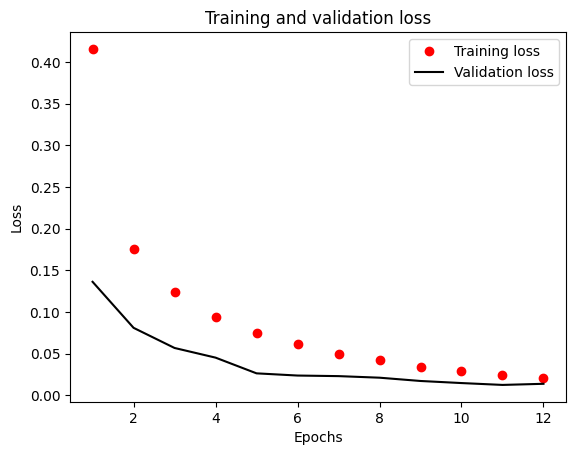

In [12]:
history_dict = History.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'k-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


###  Sample Predictions Visualization

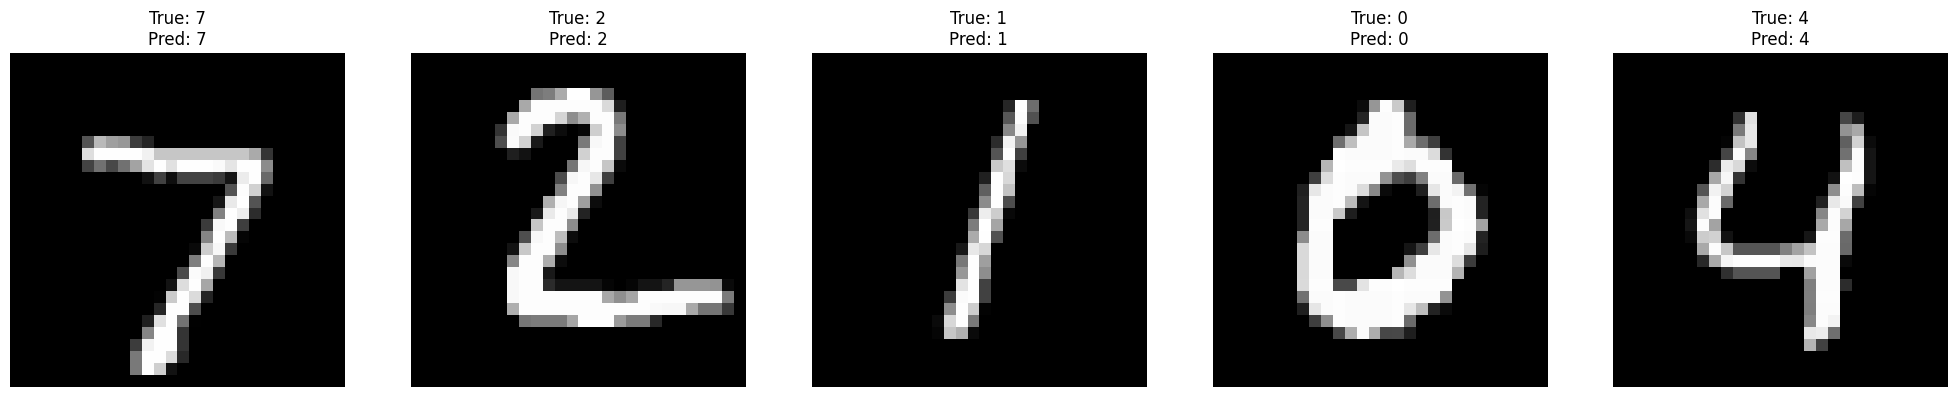

In [14]:
plt.figure(figsize=(25, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(test_labels[i])}\nPred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


### 6- Evaluate The Model

In [15]:
results = model.evaluate(X_test, y_test)
print('Test loss, Test Accuracy:', results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0746
Test loss, Test Accuracy: [0.0637584999203682, 0.9790999889373779]
